In [15]:
# importing tha dependencies

In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans

In [21]:
#data colllection and analysis

In [ ]:
#loadind the data from csv file to a pandas dataframe

In [24]:
customer=pd.read_csv('C:/Users/aditya/Desktop/Mall_Customers.csv')

In [25]:
#first 5 rows in the dataframe

In [27]:
customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
#finding the number of rows and columns

In [29]:
customer.shape

(200, 5)

In [31]:
#getting some information about the dataset

In [32]:
customer.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
#check for null value

In [8]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
customer.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
#choosing the annual income & spending column 

In [33]:
X=customer.iloc[:,[3,4]].values

In [38]:
X[0:20]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72],
       [19, 14],
       [19, 99],
       [20, 15],
       [20, 77],
       [20, 13],
       [20, 79],
       [21, 35],
       [21, 66],
       [23, 29],
       [23, 98]], dtype=int64)

In [26]:
#choosing the correct number of cluters

In [29]:
#using elbow method

In [30]:
km= KMeans()

In [32]:
km

KMeans(n_clusters=1)

In [39]:
#finding sse value for different number of cluster

In [40]:
k_rng=range(1,15)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(customer[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)

C:\Users\aditya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [41]:
sse

[269981.28000000014,
 183069.17582751295,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30552.714025467285,
 25039.434641445503,
 22758.457641641045,
 20102.68452126449,
 17970.674406287955,
 16032.113097679267,
 14606.03442435977,
 13538.522492891185]

In [42]:
#plot elbow graph (sse vs K)

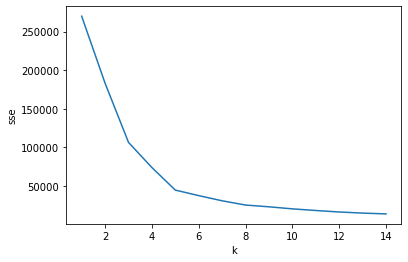

In [43]:
plt.xlabel('k')
plt.ylabel('sse')
plt.plot(k_rng,sse)

In [38]:
# this means k=5 will be the most optimal value


In [44]:
# training the k means clustering model

In [45]:
km=KMeans(n_clusters=5)

In [46]:
km

KMeans(n_clusters=5)

In [47]:
#return a label for each data point based on their cluster(0,1,2,3,4)
#means we put all the values in k means and find out the value belongs to the which cluster

In [48]:
Y=km.fit_predict(X)

In [49]:
Y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [50]:
#visualizing all the clusters and their centroids

In [51]:
customer['cluster']=Y

In [52]:
customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


In [55]:
customer1=customer[customer.cluster==0]
customer2=customer[customer.cluster==1]
customer3=customer[customer.cluster==2]
customer4=customer[customer.cluster==3]
customer5=customer[customer.cluster==4]

In [56]:
customer1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
43,44,Female,31,39,61,0
46,47,Female,50,40,55,0
47,48,Female,27,40,47,0
48,49,Female,29,40,42,0
49,50,Female,31,40,42,0


In [57]:
km.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

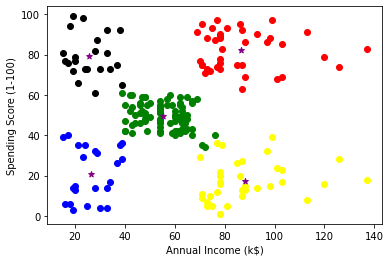

In [58]:
plt.scatter(customer1['Annual Income (k$)'],customer1['Spending Score (1-100)'],color='green')
plt.scatter(customer2['Annual Income (k$)'],customer2['Spending Score (1-100)'],color='red')
plt.scatter(customer3['Annual Income (k$)'],customer3['Spending Score (1-100)'],color='yellow')
plt.scatter(customer4['Annual Income (k$)'],customer4['Spending Score (1-100)'],color='blue')
plt.scatter(customer5['Annual Income (k$)'],customer5['Spending Score (1-100)'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [59]:
# so we have to choose that blue and yellow cluster people to focus for more spendings,and give some more offers and discounts to those people